# Plotting time-series

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd

In [4]:
climate_change = pd.read_csv("climate_change.csv")

In [5]:
climate_change.head()

,date,co2,relative_temp
0,1958-03-06,315.71,0.10
1,1958-04-06,317.45,0.01
2,1958-05-06,317.50,0.08
3,1958-06-06,NaN,-0.05
4,1958-07-06,315.86,0.06


- make a date is the indexing for Data Frame but we need to change the type to be datetime
- **parse_dates=["date"]:** This tells pandas to automatically convert the values in the "date" column to datetime objects. Without this, the values in the "date" column would be treated as plain strings.
- **index_col="date":** This sets the "date" column as the index of the DataFrame. The index is used to uniquely identify rows, so instead of having a default numerical index (0, 1, 2, ...), the dates will be used as the row labels.

In [19]:
climate_change = pd.read_csv("climate_change.csv", parse_dates=["date"], index_col="date")


In [20]:
climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


## ploting time-series data

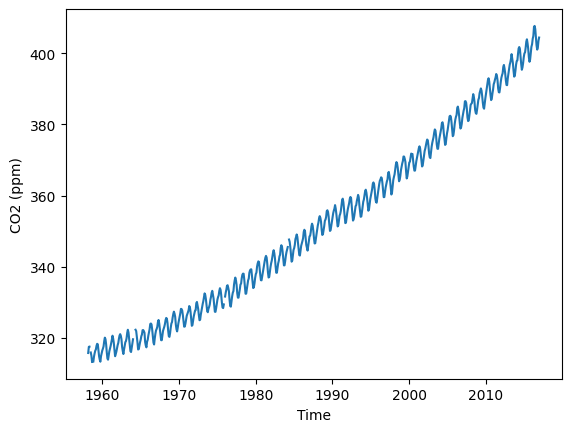

In [21]:
fig , ax = plt.subplots()
ax.plot(climate_change.index,climate_change["co2"])
ax.set_xlabel("Time")
ax.set_ylabel("CO2 (ppm)")
plt.show()

##  Zooming in on a decade

In [22]:
sixties = climate_change["1960-01-01":"1969-12-31"]

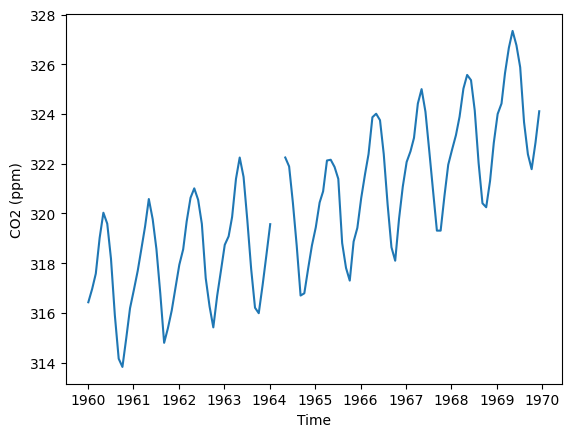

In [23]:
fig , ax = plt.subplots()
ax.plot(sixties.index,sixties["co2"])
ax.set_xlabel("Time")
ax.set_ylabel("CO2 (ppm)")
plt.show()

# Zooming in on one year

In [17]:
sixties_nine = climate_change["1969-01-01":"1969-12-31"]

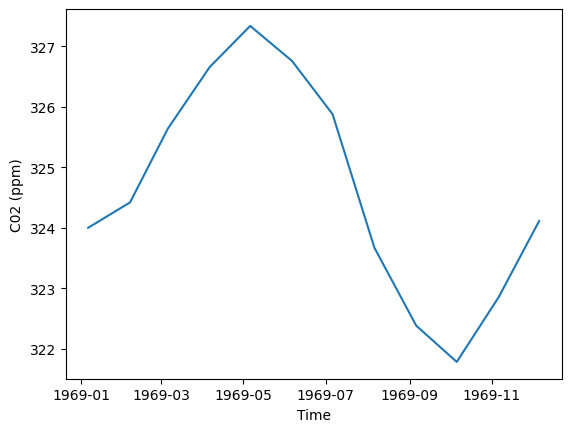

In [18]:
fig, ax = plt. subplots ()
ax.plot(sixties_nine.index, sixties_nine['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('C02 (ppm)')
plt.show()

# Plotting time-series with different variables

- To relate two time-series that coincide in terms of their times, but record the values of different variables, we might want to plot them on the same Axes.

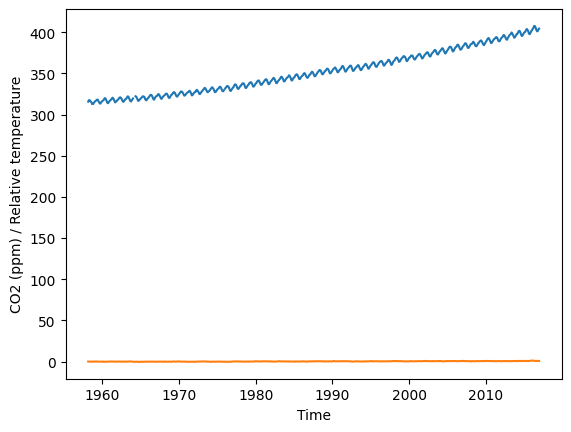

In [28]:
fig, ax = plt.subplots()
ax.plot(climate_change.index,climate_change["co2"])
ax.plot(climate_change.index,climate_change["relative_temp"])
ax.set_xlabel("Time")
ax.set_ylabel("CO2 (ppm) / Relative temperature")
plt.show()

- the line for relative temperatures looks completely flat. The problem is that the scales for these two measurements are different.

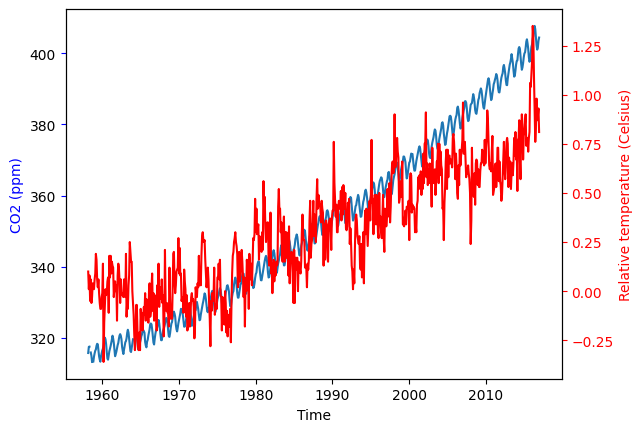

In [38]:
fig, ax = plt.subplots()
ax.plot(climate_change.index,climate_change["co2"])
ax.set_xlabel("Time")
ax.set_ylabel("CO2 (ppm)",color="b")
ax.tick_params('y',color='b')
ax2 = ax.twinx()
ax2.plot(climate_change.index,climate_change["relative_temp"],color='r')
ax2.set_ylabel("Relative temperature (Celsius)",color="r")
ax2.tick_params('y',colors='r')
plt.show()

# Annotating time-series data

In [40]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

Text(2015-10-06 00:00:00, 1, '>1 degree')

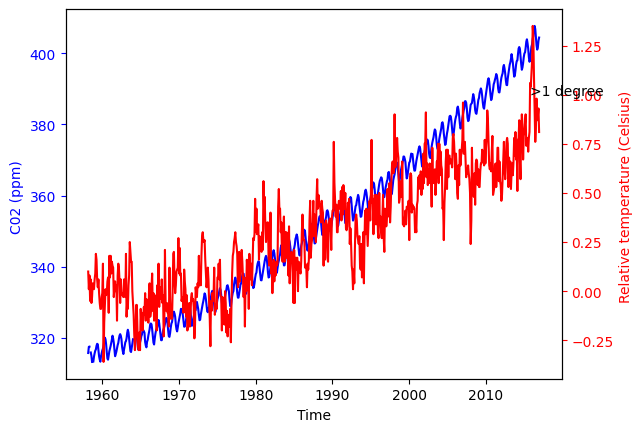

In [41]:
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change['co2'],'blue', 'Time', 'C02 (ppm) ')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index,climate_change['relative_temp'],'red', 'Time', 'Relative temperature (Celsius) ')
ax2.annotate(">1 degree",xy=(pd.Timestamp("2015-10-06"),1))

# Positioning the text

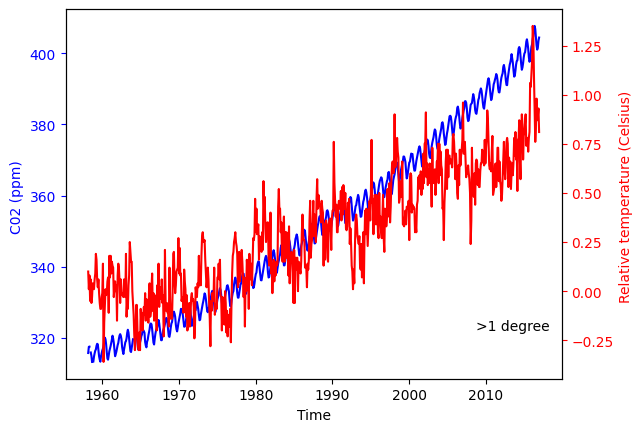

In [45]:
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change['co2'],'blue', 'Time', 'C02 (ppm) ')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index,climate_change['relative_temp'],'red', 'Time', 'Relative temperature (Celsius) ')
ax2.annotate(">1 degree",xy=(pd.Timestamp("2015-10-06"),1),
             xytext=(pd.Timestamp("2008-10-06"),-0.2))
plt.show()

# Adding arrows to annotation

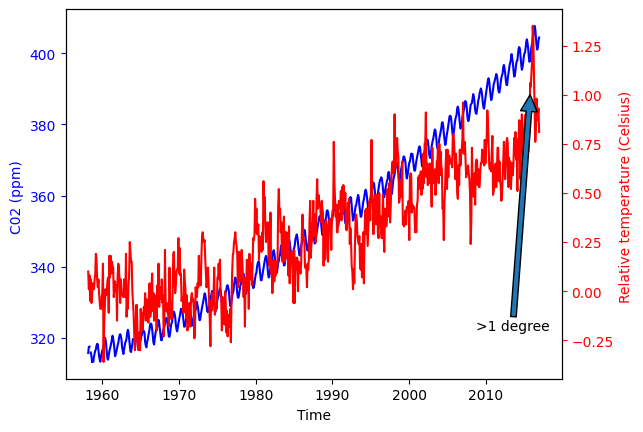

In [46]:
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change['co2'],'blue', 'Time', 'C02 (ppm) ')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index,climate_change['relative_temp'],'red', 'Time', 'Relative temperature (Celsius) ')
ax2.annotate(">1 degree",xy=(pd.Timestamp("2015-10-06"),1),
             xytext=(pd.Timestamp("2008-10-06"),-0.2),
             arrowprops={}
            )
plt.show()

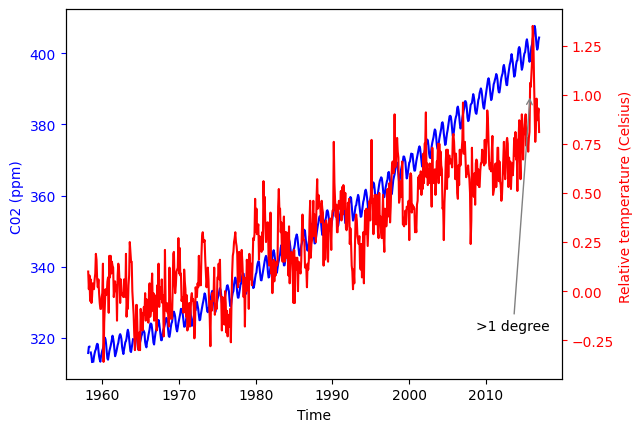

In [47]:
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change['co2'],'blue', 'Time', 'C02 (ppm) ')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index,climate_change['relative_temp'],'red', 'Time', 'Relative temperature (Celsius) ')
ax2.annotate(">1 degree",xy=(pd.Timestamp("2015-10-06"),1),
             xytext=(pd.Timestamp("2008-10-06"),-0.2),
             arrowprops={"arrowstyle":"->","color":"gray"}
            )
plt.show()

[Customizing annotations](https://matplotlib.org/users/annotations.html)